# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

In [5]:
import pandas as pd

data = pd.read_csv('bigcity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [7]:
# 2. Explore the shape of dataset (0.5 points)
#Find the number of rows in given dataset and separate the input and target variables into X and Y. You can shape function 
to get the size of the dataframe

SyntaxError: invalid syntax (<ipython-input-7-d626e0e18ebc>, line 3)

In [8]:
rows = data.shape[0]
print("No.of rows: %d" %(rows))

X = data.u  
Y = data.x 
X = X.values.reshape(len(X),1) #reshaping for making it comply with 2D
Y = Y.values.reshape(len(Y),1)

No.of rows: 49


In [9]:
print(X)

[[138]
 [ 93]
 [ 61]
 [179]
 [ 48]
 [ 37]
 [ 29]
 [ 23]
 [ 30]
 [  2]
 [ 38]
 [ 46]
 [ 71]
 [ 25]
 [298]
 [ 74]
 [ 50]
 [ 76]
 [381]
 [387]
 [ 78]
 [ 60]
 [507]
 [ 50]
 [ 77]
 [ 64]
 [ 40]
 [136]
 [243]
 [256]
 [ 94]
 [ 36]
 [ 45]
 [ 67]
 [120]
 [172]
 [ 66]
 [ 46]
 [121]
 [ 44]
 [ 64]
 [ 56]
 [ 40]
 [116]
 [ 87]
 [ 43]
 [ 43]
 [161]
 [ 36]]


In [10]:
data.isna().sum()#Check the dataset for any missing values

Unnamed: 0    0
u             0
x             0
dtype: int64

In [11]:
data.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

#Dividing the data into training and test sets with 80-20 split using scikit-learn. Displaying the shapes of training and test feature sets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [13]:
#Estimating the coefficients b0 and b1 using scikit-learn.
#coef_ and intercept_ functions can help  get coefficients & intercept

In [14]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Let us explore the coefficients for each of the independent attributes

b1 = regression_model.coef_
b0 = regression_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [[1.15945123]] and b0 is: [9.71845532]


In [15]:
#   Linear Relationship between feature and target 
#Plot the line with b1 and b0 as slope and y-intercept.

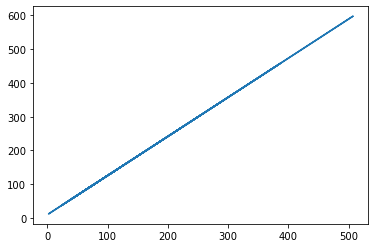

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

In [17]:
#  Evaluation of model with scikit-learn 
#Validating the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

 

In [18]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 23.385235190249123 and R^2 error is 0.9181922560396981


In [19]:
regression_model.score(X_train,y_train)

0.9682175540860046

In [20]:
regression_model.score(X_test,y_test)

0.9181922560396981